In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [10]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [11]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

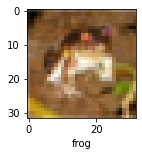

In [14]:
plot_sample(X_train, y_train, 0)

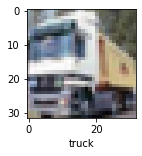

In [15]:
plot_sample(X_train, y_train, 1)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
X_train[0].shape

(32, 32, 3)

In [21]:
X_flat = X_train.reshape(len(X_train), 32*32*3)
X_test_flat = X_test.reshape(len(X_test), 32*32*3)

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape=(3072,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_flat, y_train, epochs=20, validation_data=(X_test_flat,y_test))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8780 - accuracy: 0.3189 - val_loss: 1.7548 - val_accuracy: 0.3597
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7283 - accuracy: 0.3762 - val_loss: 1.6747 - val_accuracy: 0.4032
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6773 - accuracy: 0.3979 - val_loss: 1.6256 - val_accuracy: 0.4228
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6438 - accuracy: 0.4084 - val_loss: 1.6364 - val_accuracy: 0.4081
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6257 - accuracy: 0.4164 - val_loss: 1.6075 - val_accuracy: 0.4210
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6103 - accuracy: 0.4229 - val_loss: 1.6278 - val_accuracy: 0.4163
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5963 - accuracy: 0.4282 - val_loss: 1.6143 - val_accuracy:

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test_flat)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.45      0.51      1000
           1       0.55      0.59      0.57      1000
           2       0.38      0.20      0.27      1000
           3       0.29      0.38      0.33      1000
           4       0.35      0.34      0.34      1000
           5       0.38      0.29      0.33      1000
           6       0.39      0.69      0.50      1000
           7       0.57      0.42      0.48      1000
           8       0.58      0.59      0.58      1000
           9       0.50      0.54      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.44     10000
weighted avg       0.46      0.45      0.44     10000



In [26]:
# cnn 
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation = 'relu',input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

In [27]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
Total params: 20,256
Trainable params: 20,256
Non-trainable params: 0
_________________________________________________________________


In [28]:
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [31]:
cnn.fit(X_train,y_train,epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.1036 - accuracy: 0.6141 - val_loss: 1.1788 - val_accuracy: 0.5811
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.0417 - accuracy: 0.6368 - val_loss: 1.0648 - val_accuracy: 0.6273
Epoch 3/5
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9930 - accuracy: 0.6546 - val_loss: 1.0473 - val_accuracy: 0.6349
Epoch 4/5
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9555 - accuracy: 0.6689 - val_loss: 0.9918 - val_accuracy: 0.6580
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9267 - accuracy: 0.6784 - val_loss: 1.0001 - val_accuracy: 0.6514


In [22]:
y_pred = cnn.predict(X_test)

In [3]:
import keras

In [6]:
(X_train_1, y_train_1) , (X_test_1, y_test_1) = keras.datasets.mnist.load_data()


In [8]:
X_test_1.shape

(28, 28)

In [23]:
len(X_train_1)

60000

In [24]:
X_train_1.shape

(60000, 28, 28)

In [29]:
X_train_1[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [57]:
X_test_1[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
X_train_1 = X_train_1/255
X_test_1 = X_test_1/255

In [42]:
X_test_1[0].shape

(28, 28)

In [19]:
X_test_1[0].shape

(28, 28)

In [32]:
X_train_flattened = X_train_1.reshape(len(X_train_1), 28*28)
X_test_flattened = X_test_1.reshape(len(X_test_1), 28*28)

In [33]:
X_test_flattened.shape

(10000, 784)

In [34]:
classes_mnist = ["zero","one","two","three","four","five","six","seven","eight","nine"]

In [35]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes_mnist[y[index]])

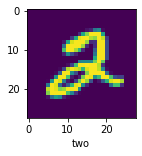

In [36]:
plot_sample(X_train_1,y_train_1,5)

In [45]:
ann_mnist = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(92, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann_mnist.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history =ann_mnist.fit(X_train_1, y_train_1, epochs=15, validation_data=(X_test_1,y_test_1))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9241 - val_loss: 0.1483 - val_accuracy: 0.9546
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1136 - accuracy: 0.9651 - val_loss: 0.1057 - val_accuracy: 0.9671
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0813 - accuracy: 0.9753 - val_loss: 0.0893 - val_accuracy: 0.9732
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0620 - accuracy: 0.9803 - val_loss: 0.0874 - val_accuracy: 0.9729
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0962 - val_accuracy: 0.9717
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.1094 - val_accuracy: 0.9670
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0925 - val_accuracy:

Text(0.5, 1.0, 'Loss values')

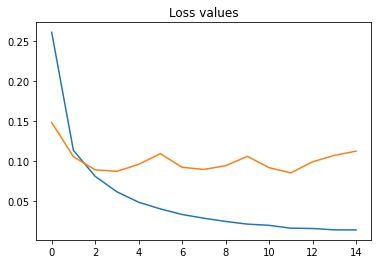

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss values')

Text(0.5, 1.0, 'Accuracy function')

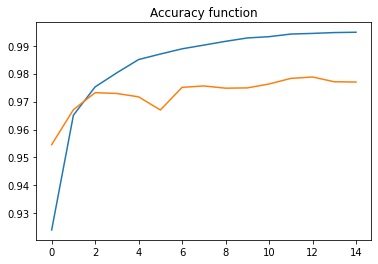

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy function')

In [48]:
ann_mnist.save("mnist_model.h5")